In [2]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.utils import util
from mejiro.instruments.hwo import HWO
from mejiro.instruments.roman import Roman

In [2]:
hwo = HWO()

In [4]:
print(hwo.name)

HWO


In [3]:
pprint(hwo.pixel_scale)

array([0.00452958, 0.00452958, 0.00452958, 0.00452958, 0.00452958,
       0.00452958, 0.00452958, 0.01585351, 0.01585351, 0.01585351])


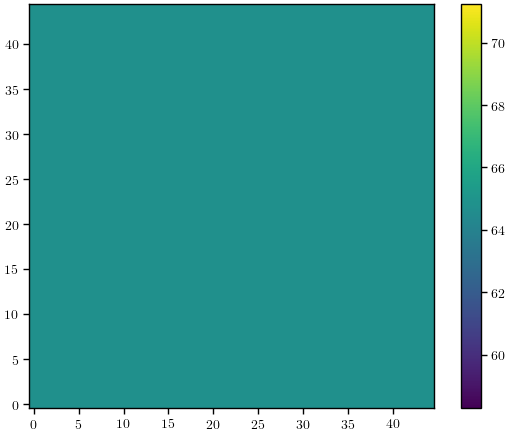

In [4]:
roman = Roman()

bkgs = roman.get_sky_bkgs(['F129'], 146, 45, 1)
bkg = bkgs['F129']
bkg_array = bkg.array

plt.imshow(bkg_array)
plt.colorbar()
plt.show()